In [38]:
import pandas as pd
import os
from datetime import datetime, timedelta

df = pd.read_csv(os.path.join("..", "data", "raw", "train.csv"), low_memory=False)
df.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,bg-5:05,bg-5:00,bg-4:55,bg-4:50,bg-4:45,bg-4:40,bg-4:35,bg-4:30,bg-4:25,bg-4:20,bg-4:15,bg-4:10,bg-4:05,bg-4:00,bg-3:55,bg-3:50,bg-3:45,bg-3:40,bg-3:35,bg-3:30,bg-3:25,bg-3:20,bg-3:15,bg-3:10,bg-3:05,bg-3:00,bg-2:55,bg-2:50,bg-2:45,bg-2:40,bg-2:35,bg-2:30,bg-2:25,bg-2:20,bg-2:15,bg-2:10,bg-2:05,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,bg-1:10,bg-1:05,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00,insulin-5:55,insulin-5:50,insulin-5:45,insulin-5:40,insulin-5:35,insulin-5:30,insulin-5:25,insulin-5:20,insulin-5:15,insulin-5:10,insulin-5:05,insulin-5:00,insulin-4:55,insulin-4:50,insulin-4:45,insulin-4:40,insulin-4:35,insulin-4:30,insulin-4:25,insulin-4:20,insulin-4:15,insulin-4:10,insulin-4:05,insulin-4:00,insulin-3:55,insulin-3:50,insulin-3:45,insulin-3:40,insulin-3:35,insulin-3:30,insulin-3:25,insulin-3:20,insulin-3:15,insulin-3:10,insulin-3:05,insulin-3:00,insulin-2:55,insulin-2:50,insulin-2:45,insulin-2:40,insulin-2:35,insulin-2:30,insulin-2:25,insulin-2:20,insulin-2:15,insulin-2:10,insulin-2:05,insulin-2:00,insulin-1:55,insulin-1:50,insulin-1:45,insulin-1:40,insulin-1:35,insulin-1:30,insulin-1:25,insulin-1:20,insulin-1:15,insulin-1:10,insulin-1:05,insulin-1:00,insulin-0:55,insulin-0:50,insulin-0:45,insulin-0:40,insulin-0:35,insulin-0:30,insulin-0:25,insulin-0:20,insulin-0:15,insulin-0:10,insulin-0:05,insulin-0:00,carbs-5:55,carbs-5:50,carbs-5:45,carbs-5:40,carbs-5:35,carbs-5:30,carbs-5:25,carbs-5:20,carbs-5:15,carbs-5:10,carbs-5:05,carbs-5:00,carbs-4:55,carbs-4:50,carbs-4:45,carbs-4:40,carbs-4:35,carbs-4:30,carbs-4:25,carbs-4:20,carbs-4:15,carbs-4:10,carbs-4:05,carbs-4:00,carbs-3:55,carbs-3:50,carbs-3:45,carbs-3:40,carbs-3:35,carbs-3:30,carbs-3:25,carbs-3:20,carbs-3:15,carbs-3:10,carbs-3:05,carbs-3:00,carbs-2:55,carbs-2:50,carbs-2:45,carbs-2:40,carbs-2:35,carbs-2:30,carbs-2:25,carbs-2:20,carbs-2:15,carbs-2:10,carbs-2:05,carbs-2:00,carbs-1:55,carbs-1:50,carbs-1:45,carbs-1:40,carbs-1:35,carbs-1:30,carbs-1:25,carbs-1:20,carbs-1:15,carbs-1:10,carbs-1:05,carbs-1:00,carbs-0:55,carbs-0:50,carbs-0:45,carbs-0:40,carbs-0:35,carbs-0:30,carbs-0:25,carbs-0:20,carbs-0:15,carbs-0:10,carbs-0:05,carbs-0:00,hr-5:55,hr-5:50,hr-5:45,hr-5:40,hr-5:35,hr-5:30,hr-5:25,hr-5:20,hr-5:15,hr-5:10,hr-5:05,hr-5:00,hr-4:55,hr-4:50,hr-4:45,hr-4:40,hr-4:35,hr-4:30,hr-4:25,hr-4:20,hr-4:15,hr-4:10,hr-4:05,hr-4:00,hr-3:55,hr-3:50,hr-3:45,hr-3:40,hr-3:35,hr-3:30,hr-3:25,hr-3:20,hr-3:15,hr-3:10,hr-3:05,hr-3:00,hr-2:55,hr-2:50,hr-2:45,hr-2:40,hr-2:35,hr-2:30,hr-2:25,hr-2:20,hr-2:15,hr-2:10,hr-2:05,hr-2:00,hr-1:55,hr-1:50,hr-1:45,hr-1:40,hr-1:35,hr-1:30,hr-1:25,hr-1:20,hr-1:15,hr-1:10,hr-1:05,hr-1:00,hr-0:55,hr-0:50,hr-0:45,hr-0:40,hr-0:35,hr-0:30,hr-0:25,hr-0:20,hr-0:15,hr-0:10,hr-0:05,hr-0:00,steps-5:55,steps-5:50,steps-5:45,steps-5:40,steps-5:35,steps-5:30,steps-5:25,steps-5:20,steps-5:15,steps-5:10,steps-5:05,steps-5:00,steps-4:55,steps-4:50,steps-4:45,steps-4:40,steps-4:35,steps-4:30,steps-4:25,steps-4:20,steps-4:15,steps-4:10,steps-4:05,steps-4:00,steps-3:55,steps-3:50,steps-3:45,steps-3:40,steps-3:35,steps-3:30,steps-3:25,steps-3:20,steps-3:15,steps-3:10,steps-3:05,steps-3:00,steps-2:55,steps-2:50,steps-2:45,steps-2:40,steps-2:35,steps-2:30,steps-2:25,steps-2:20,steps-2:15,steps-2:10,steps-2:05,steps-2:00,steps-1:55,steps-1:50,steps-1:45,steps-1:40,steps-1:35,steps-1:30,steps-1:25,steps-1:20,steps-1:15,steps-1:10,steps-1:05,steps-1:00,steps-0:55,steps-0:50,steps-0:45,steps-0:40,steps-0:35,steps-0:30,steps-0:25,steps-0:20,steps-0:15,steps-0:10,steps-0:05,steps-0:00,cals-5:55,cals-5:50,cals-5:45,cals-5:40,cals-5:35,cals-5:30,cals-5:25,cals-5:20,cals-5:15,cals-5:10,cals-5:05,cals-5:00,cals-4:55,cals-4:50,cals-4:45,cals-4:40,cals-4:35,cals-4:30,cals-4:25,cals-4:20,cals-4:15,cals-4:10,cals-4:05,cals-4:00,cals-3:55,cals-3:50,cals-3:45,cals-3:40,cals-3:35,cals-3:30,cals-3:25,cal

Separating the data for each patient. Adding a datetime column with an artificial starting date to each patient data frame.

In [39]:
patients=[]
for p_num in df['p_num'].unique():
    dfp = df[df['p_num']==p_num].copy()
    dfp.reset_index(inplace=True, drop=True)
    dfp['time'] = pd.to_datetime(dfp['time'], format='%H:%M:%S').dt.time
    start_date=datetime(2020,1,1)
    current_date = start_date
    assigned_dates = [start_date]

    for index, row in dfp.iloc[1:,:].iterrows():
        if row['time'] <= dfp['time'].loc[index-1]:
            current_date += timedelta(days=1)
            if row['time'] == dfp['time'].loc[index-1]:
                print('ERROR')
        assigned_dates.append(current_date)

    dfp['date'] = assigned_dates
    dfp['datetime'] = dfp.apply(lambda row: datetime.combine(row['date'], row['time']), axis=1)
    patients.append(dfp)

Show the differences between values in column 'time' and their modes. As expected there are the modes 5 minutes and 15 minutes.

In [40]:
for dfp in patients:
    dfp['timedelta'] = dfp['datetime'].diff()
    print('Unique values for the timedelta of patient', dfp['p_num'].iloc[0])
    print(pd.Series(dfp['timedelta'].unique()).sort_values())
    print('Mode for the timedelta of patient', dfp['p_num'].iloc[0])
    print(pd.Series(dfp['timedelta']).mode())

Unique values for the timedelta of patient p01
3    0 days 00:10:00
1    0 days 00:15:00
2    0 days 00:20:00
4    0 days 00:30:00
10   0 days 00:45:00
15   0 days 01:00:00
7    0 days 01:05:00
13   0 days 01:25:00
11   0 days 02:05:00
12   0 days 02:20:00
16   0 days 02:30:00
6    0 days 02:35:00
8    0 days 02:55:00
17   0 days 03:00:00
5    0 days 03:05:00
19   0 days 03:45:00
20   0 days 03:55:00
9    0 days 04:00:00
18   0 days 05:45:00
14   0 days 10:15:00
0                NaT
dtype: timedelta64[ns]
Mode for the timedelta of patient p01
0   0 days 00:15:00
Name: timedelta, dtype: timedelta64[ns]
Unique values for the timedelta of patient p02
1    0 days 00:05:00
4    0 days 00:10:00
5    0 days 00:15:00
11   0 days 00:20:00
9    0 days 02:05:00
7    0 days 02:15:00
3    0 days 02:40:00
8    0 days 03:05:00
6    0 days 03:25:00
10   0 days 03:45:00
2    0 days 04:35:00
12   0 days 19:15:00
0                NaT
dtype: timedelta64[ns]
Mode for the timedelta of patient p02
0   0 days

In [41]:
import numpy as np
pd.set_option('display.max_columns', None)

tdlst = []
td = pd.Timedelta(minutes=5)

for n in range(71, -1, -1):
    tdlst.append((n*td, f'{(n*td).components.hours:01}:{(n*td).components.minutes:02}'))

dfp = patients[0]
timeseries = {}

for i, row in dfp.iloc[:5, :].iterrows():
    for c in tdlst:
        # check whether there already is a value for this point in time
        if (row['datetime'] - c[0]) not in timeseries:
            # there is no value, just add it to the series
            timeseries[row['datetime'] - c[0]] = row['bg-'+c[1]]
        else:
            # there already is a value
            # check if the value already existing in the timeseries agrees with the one found in the row
            if timeseries[row['datetime'] - c[0]] != row['bg-'+c[1]]:
                if (not np.isnan(timeseries[row['datetime'] - c[0]])) or (not np.isnan(row['bg-'+c[1]])):
                    h1 = timeseries[row['datetime'] - c[0]]
                    h2 = row['bg-'+c[1]]
                    print(f'ERROR! Value in timeseries={h1},{type(h1)} != {h2},{type(h2)} = value in row')

print(dfp.iloc[:5,:76].head())
for i in timeseries:    
    print(i, timeseries[i])

      id p_num      time  bg-5:55  bg-5:50  bg-5:45  bg-5:40  bg-5:35  \
0  p01_0   p01  06:10:00      NaN      NaN      9.6      NaN      NaN   
1  p01_1   p01  06:25:00      NaN      NaN      9.7      NaN      NaN   
2  p01_2   p01  06:40:00      NaN      NaN      9.2      NaN      NaN   
3  p01_3   p01  06:55:00      NaN      NaN      8.7      NaN      NaN   
4  p01_4   p01  07:10:00      NaN      NaN      8.4      NaN      NaN   

   bg-5:30  bg-5:25  bg-5:20  bg-5:15  bg-5:10  bg-5:05  bg-5:00  bg-4:55  \
0      9.7      NaN      NaN      9.2      NaN      NaN      8.7      NaN   
1      9.2      NaN      NaN      8.7      NaN      NaN      8.4      NaN   
2      8.7      NaN      NaN      8.4      NaN      NaN      8.1      NaN   
3      8.4      NaN      NaN      8.1      NaN      NaN      8.3      NaN   
4      8.1      NaN      NaN      8.3      NaN      NaN      9.6      NaN   

   bg-4:50  bg-4:45  bg-4:40  bg-4:35  bg-4:30  bg-4:25  bg-4:20  bg-4:15  \
0      NaN      8.4  

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,date,datetime
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,2020-01-01,2020-01-01 06:10:00
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,2020-01-01,2020-01-01 06:25:00
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,2020-01-01,2020-01-01 06:40:00
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,2020-01-01,2020-01-01 06:55:00
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,2020-01-01,2020-01-01 07:10:00


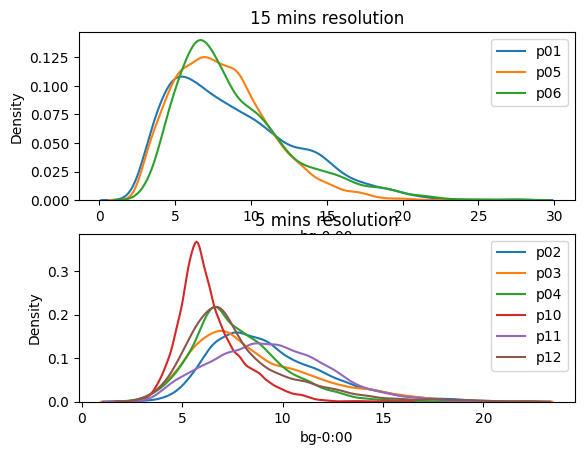

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

patients15 = [patients[0], patients[4], patients[5]]
patients5 = [patients[1],patients[2],patients[3],patients[6],patients[7],patients[8]]

plt.subplot(2,1,1)
plt.title('15 mins resolution')
for df in patients15:
    sns.kdeplot(df['bg-0:00'], label=df['p_num'].iloc[0])
plt.legend()

plt.subplot(2,1,2)
plt.title('5 mins resolution')
for df in patients5:
    sns.kdeplot(df['bg-0:00'], label=df['p_num'].iloc[0])
plt.legend();

<Axes: >

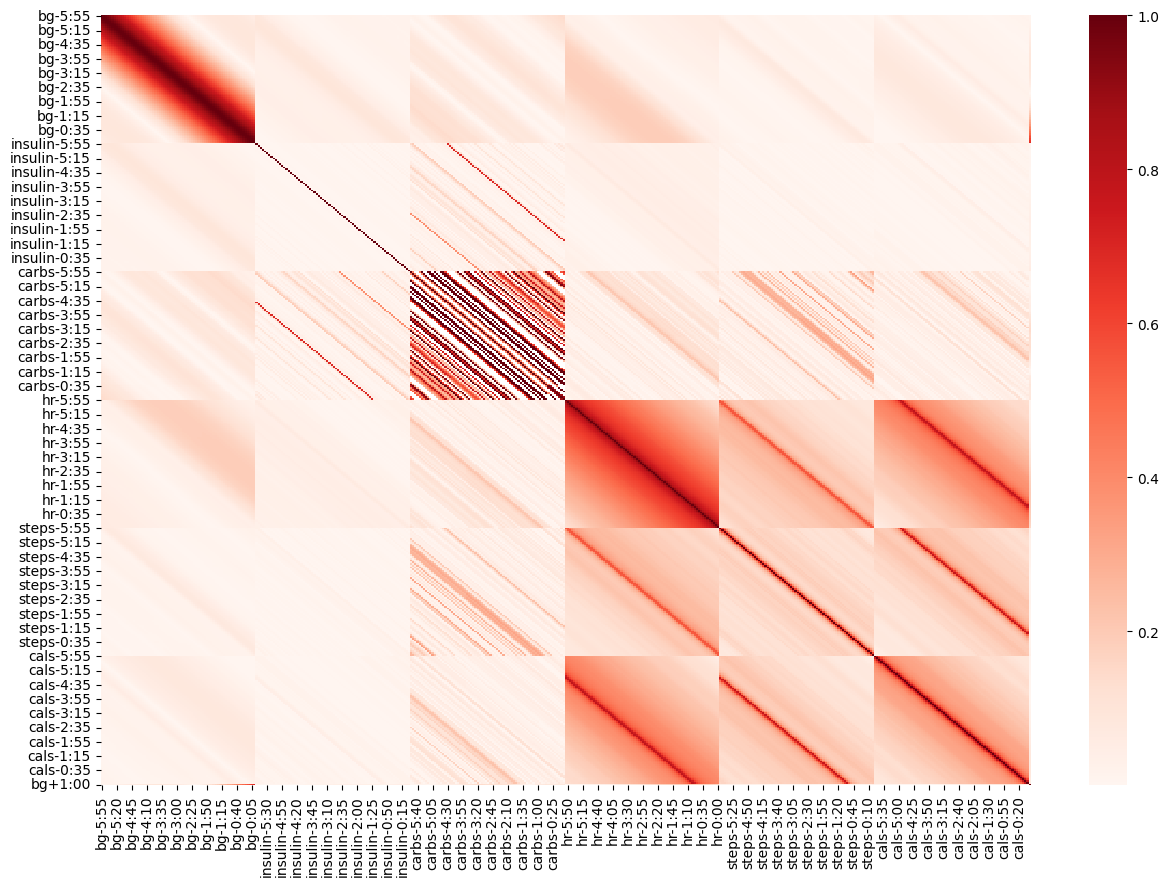

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(patients5[1].corr(numeric_only=True).abs(), cmap='Reds')
#sns.heatmap(patients15[0].select_dtypes('number').corr().abs(), cmap='Reds')